In [2]:
%matplotlib inline
import pandas as pd


from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
# raw keras
from livelossplot.keras import PlotLossesCallback

# tensorflow.keras
# from livelossplot.tf_keras import PlotLossesCallback

Using TensorFlow backend.


In [3]:
df = pd.read_csv( "./pd_speech_features.csv", skiprows=[0] );

In [4]:
df['class'].value_counts()

1    564
0    192
Name: class, dtype: int64

In [5]:
X = df.drop('class',axis=1).to_numpy()
y = df['class'].to_numpy()

# Dividir os dados em conjuntos de treinamento e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [19]:
type(X_train)

numpy.ndarray

In [8]:
# data preprocessing
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.

In [9]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',  # 'mean_squared_error'
              metrics=['accuracy', 'mean_squared_error'])

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
plot_losses = PlotLossesCallback()

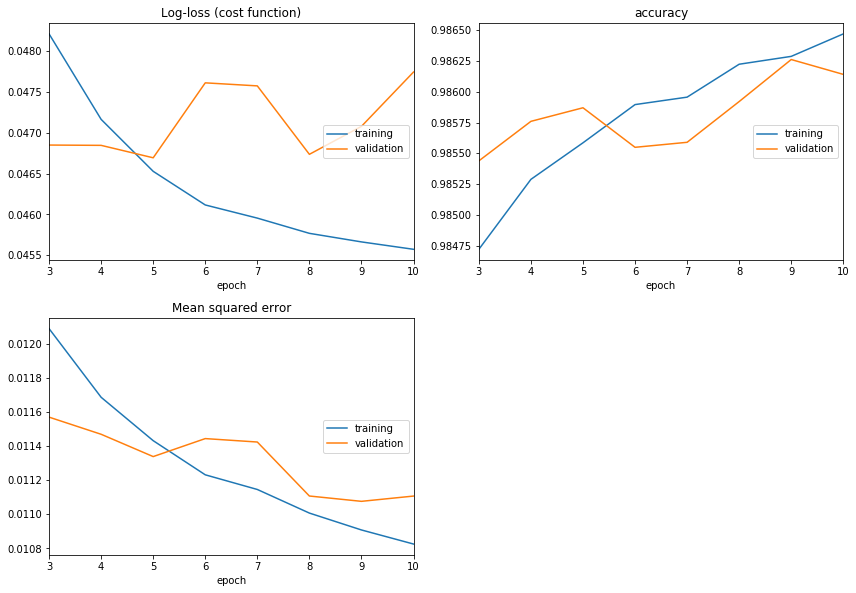

Log-loss (cost function):
training   (min:    0.046, max:    0.072, cur:    0.046)
validation (min:    0.047, max:    0.050, cur:    0.048)

accuracy:
training   (min:    0.976, max:    0.986, cur:    0.986)
validation (min:    0.984, max:    0.986, cur:    0.986)

Mean squared error:
training   (min:    0.011, max:    0.019, cur:    0.011)
validation (min:    0.011, max:    0.013, cur:    0.011)


In [11]:
model.fit(X_train, Y_train,
          epochs=10,
          validation_data=(X_test, Y_test),
          callbacks=[plot_losses],
          verbose=0)